In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t


- Regression allows us to model mathematically the relationship between two or more variables. 

- independent variable  ( features x )
- dependent variable ( target      y )

### problem statements :
- lets assume that you are a small restaurant owner or a very business minded server/waiter at a restaurant. Tips are very important part of waiter's pay. Most of the time the dollar amount of tip is related to the total bill. As a waiter/ owner , you would like to develop a model that will allow you to make a prediction about what amount of tip to expect for any given bil amount. Therefore we collect data for meals . 

In [33]:
#y -->tip and x-->total_bill 

In [6]:
df = sns.load_dataset("tips")

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.shape

(244, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
df = df[["total_bill","tip"]]
df

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [15]:
round(df['tip'].mean())

3

In [14]:
df["tip"].mean()

2.9982786885245902

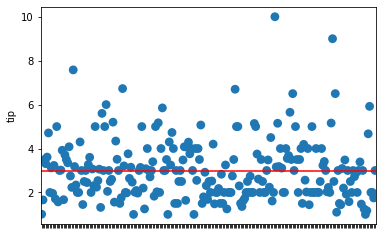

In [16]:
plt.gca()
sns.pointplot(x = df.index,
             y = df["tip"],join=False)

plt.axhline(df["tip"].mean(),color = "r")
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.show()


In [9]:
# with only one variable, tips(Y) ,we can uuse its mean for best prediction ! 
df["tip"].mean() # that mean line is the best fit line 

2.9982786885245902

### goodness of fit for tips 

In [10]:
np.sum((df["tip"] - df["tip"].mean())**2)

465.2124770491804

In [19]:
np.sum((df['tip']-df['tip'].mean())**2) #subtract mean from each, square it then add it 

465.2124770491804


#### above we did , sum of squared residuals ! That is clalled Sum of squared errors (SSE) 

In [20]:
SST = np.sum((df["tip"] - df["tip"].mean())**2)
SST

465.2124770491804

### BI-VARIATE STATISTICS   

 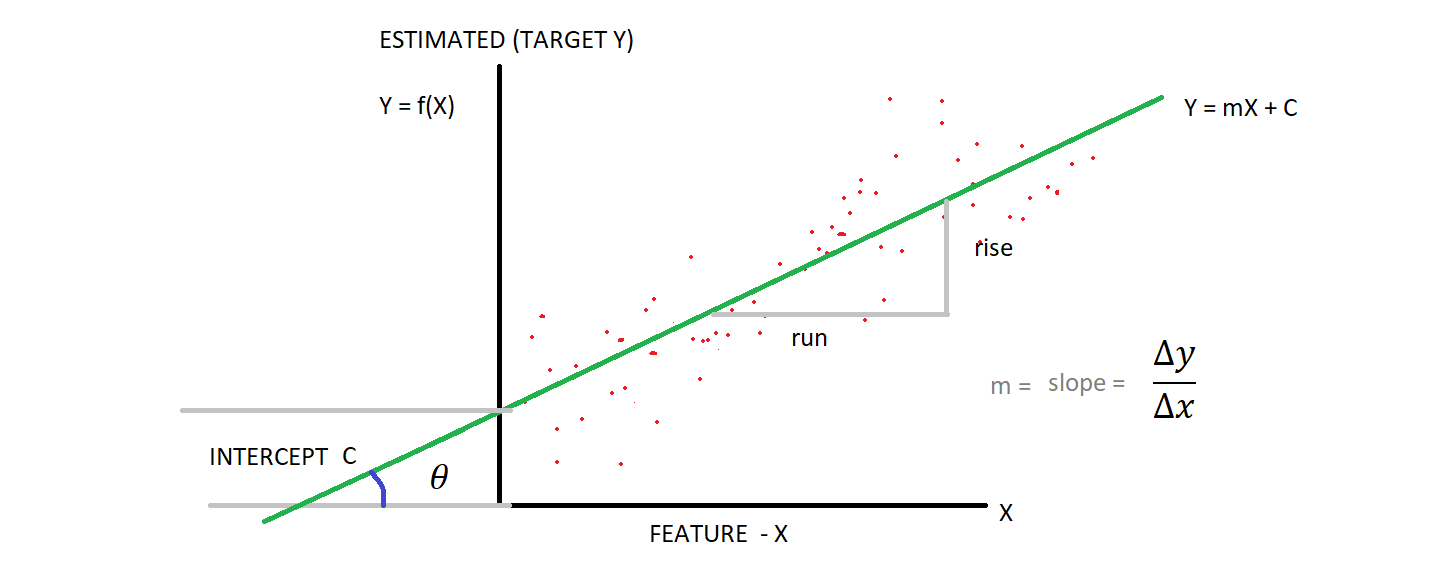

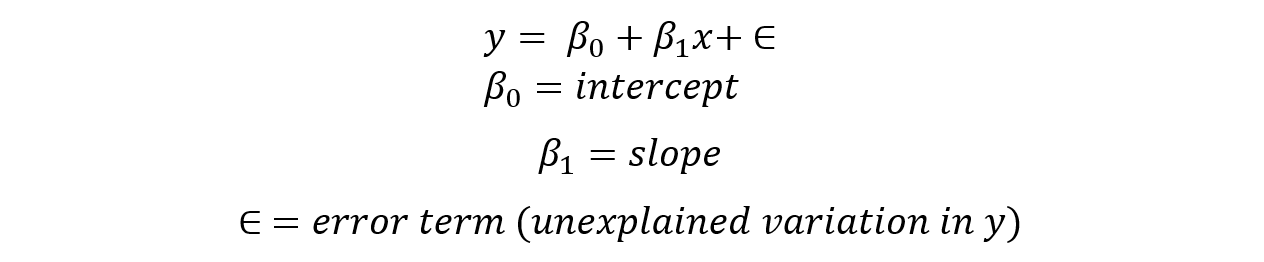

  - If we actually knew the population parameters, beta 0 and bet1 , we could use the simple linear regression equation :
   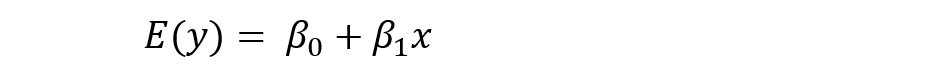
   
  - In reality we almost never have the population parameter. Therefore we estimate using sample data ! When using sample data we have to change quation which accounts estimate including error! 
       
  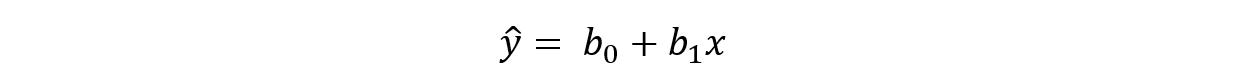
  
  - y-hat is point estimator of E(y) ! 
  - y-hat is the mean value of y for a given value of x . 
       

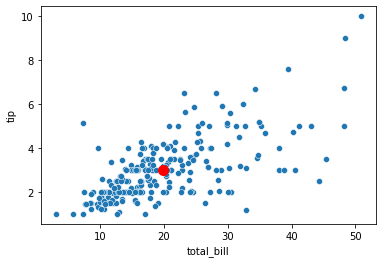

In [23]:
sns.scatterplot(y = df["tip"],
               x = df["total_bill"])
plt.plot([df["total_bill"].mean()], [df["tip"].mean()],marker = "o",markersize = 10,markeredgecolor = "red", color = "r")

- Red dot is the Total bill amount mean and tip amount mean point . which is called centroid.

-  best fit regression line must pass through centroid

In [24]:
df["total_bill"].mean(),df["tip"].mean() # centroid. 

(19.785942622950824, 2.9982786885245902)

In [14]:
np.corrcoef(x = df["tip"],y=  df["total_bill"]) #pearson coefficient 
#0.675 means moderate strong +ve correlation 

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [27]:
df['tip'].corr(df['total_bill']) #returns the same thing 
#for linear pearson use kro for non linear use spearman rank correlations

0.6757341092113641

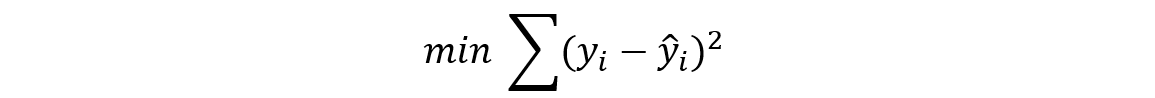

yi observed value of dependent variable (tip amount)
yi-hat : estimated/ predicted amount of dependent variable (predicated tip amount)

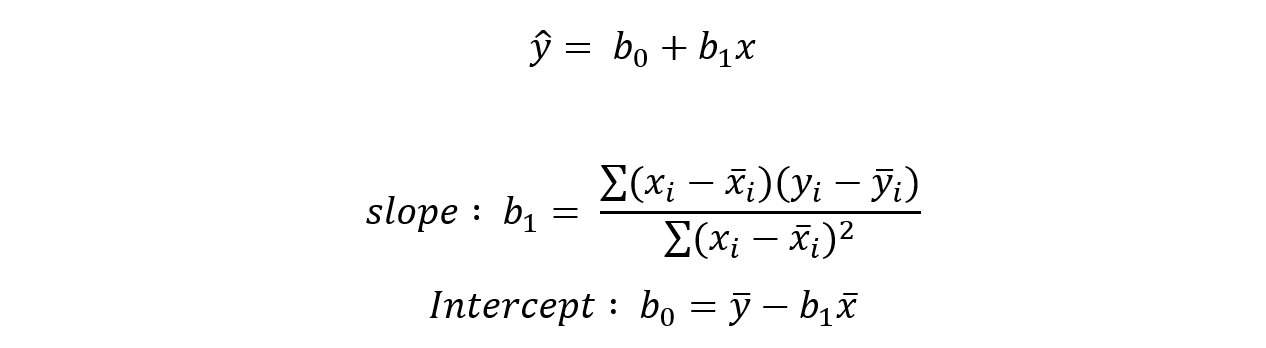

In [30]:
#above formula for slope comes for solving for minimising sum of squared errors.

In [31]:
np.sum(((df["total_bill"] - df["total_bill"].mean())) * ((df["tip"] - df["tip"].mean())) ) 

2022.6108959016394

In [32]:
np.sum((df['total_bill']-df['total_bill'].mean())*(df['tip']-df['tip'].mean())) 
# (x-x_)(y-y_) to find covariance and uska sum 

2022.6108959016394

In [34]:
np.sum(((df["total_bill"] - df["total_bill"].mean()))**2) ## (xi-xi_)2 ka sum

19258.46408319672

In [35]:
2022.6108959016394/19258.46408319672

0.10502451738435341

In [36]:
slope = (np.sum(((df["total_bill"] - df["total_bill"].mean())) * ((df["tip"] - df["tip"].mean())) )) / (np.sum(((df["total_bill"] - df["total_bill"].mean()))**2))

slope

0.10502451738435341

In [38]:
intercept = df["tip"].mean() - (slope * df["total_bill"].mean())
intercept
# y_-slope*x_=c 

0.9202696135546722

In [40]:
def estimatorFunction(x,slope,intercept):
    return (slope*x) + intercept
#y=mx+c 

#estimatorFunction = np.vectorize(estimatorFunction)

In [43]:
estimatorFunction(np.array([10,500,1000,1500]),slope,intercept)

array([  1.97051479,  53.43252831, 105.944787  , 158.45704569])

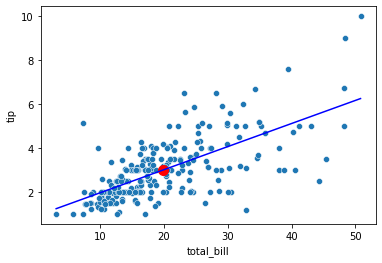

In [44]:
sns.scatterplot(y = df["tip"],
               x = df["total_bill"])
plt.plot([df["total_bill"].mean()],
             [df["tip"].mean()],marker = "o",markersize = 10,markeredgecolor = "red", color = "r")
x = np.linspace(min(df["total_bill"]),max(df["total_bill"]))
y = estimatorFunction(x,slope,intercept)
plt.plot(x,y,color = "b")

In [47]:
import scipy
scipy.stats.linregress(df["total_bill"],df["tip"])

LinregressResult(slope=0.1050245173843534, intercept=0.9202696135546726, rvalue=0.6757341092113641, pvalue=6.692470646864404e-34, stderr=0.007364789848762602, intercept_stderr=0.1597347463764325)

## Fit and the coefficient of determination 

In [50]:
SST= np.sum((df['tip']-df['tip'].mean())**2) #ssum of squares total , values mean se kitni door hai?
SST

465.2124770491804

In [51]:
SST    # sum((y -ybar)^2)

465.2124770491804

In [52]:
# estimated regression values : 
# (observed - predicted)

In [54]:
df['predicted']=estimatorFunction(df['total_bill'],slope,intercept)
df

,total_bill,tip,predicted
0,16.99,1.01,2.704636
1,10.34,1.66,2.006223
2,21.01,3.50,3.126835
3,23.68,3.31,3.407250
4,24.59,3.61,3.502822
...,...,...,...
239,29.03,5.92,3.969131
240,27.18,2.00,3.774836
241,22.67,2.00,3.301175
242,17.82,1.75,2.791807


In [25]:
df["predicted"] = estimatorFunction(df["total_bill"],slope,intercept)
df

,total_bill,tip,predicted
0,16.99,1.01,2.704636
1,10.34,1.66,2.006223
2,21.01,3.50,3.126835
3,23.68,3.31,3.407250
4,24.59,3.61,3.502822
...,...,...,...
239,29.03,5.92,3.969131
240,27.18,2.00,3.774836
241,22.67,2.00,3.301175
242,17.82,1.75,2.791807


In [56]:
# residual     error = predicted - observe 

df["observed-predicted"] = (df["tip"] - df["predicted"])
df['residuals']=df['observed-predicted']
df

,total_bill,tip,predicted,observed-predicted,residuals
0,16.99,1.01,2.704636,-1.694636,-1.694636
1,10.34,1.66,2.006223,-0.346223,-0.346223
2,21.01,3.50,3.126835,0.373165,0.373165
3,23.68,3.31,3.407250,-0.097250,-0.097250
4,24.59,3.61,3.502822,0.107178,0.107178
...,...,...,...,...,...
239,29.03,5.92,3.969131,1.950869,1.950869
240,27.18,2.00,3.774836,-1.774836,-1.774836
241,22.67,2.00,3.301175,-1.301175,-1.301175
242,17.82,1.75,2.791807,-1.041807,-1.041807


In [57]:
df['squared_error']=df['residuals']**2
df

,total_bill,tip,predicted,observed-predicted,residuals,squared_error
0,16.99,1.01,2.704636,-1.694636,-1.694636,2.871792
1,10.34,1.66,2.006223,-0.346223,-0.346223,0.119870
2,21.01,3.50,3.126835,0.373165,0.373165,0.139252
3,23.68,3.31,3.407250,-0.097250,-0.097250,0.009458
4,24.59,3.61,3.502822,0.107178,0.107178,0.011487
...,...,...,...,...,...,...
239,29.03,5.92,3.969131,1.950869,1.950869,3.805888
240,27.18,2.00,3.774836,-1.774836,-1.774836,3.150043
241,22.67,2.00,3.301175,-1.301175,-1.301175,1.693057
242,17.82,1.75,2.791807,-1.041807,-1.041807,1.085361


In [60]:
df["Squared Error"] = df["observed-predicted"]**2
df


,total_bill,tip,predicted,observed-predicted,residuals,squared_error,Squared Error
0,16.99,1.01,2.704636,-1.694636,-1.694636,2.871792,2.871792
1,10.34,1.66,2.006223,-0.346223,-0.346223,0.119870,0.119870
2,21.01,3.50,3.126835,0.373165,0.373165,0.139252,0.139252
3,23.68,3.31,3.407250,-0.097250,-0.097250,0.009458,0.009458
4,24.59,3.61,3.502822,0.107178,0.107178,0.011487,0.011487
...,...,...,...,...,...,...,...
239,29.03,5.92,3.969131,1.950869,1.950869,3.805888,3.805888
240,27.18,2.00,3.774836,-1.774836,-1.774836,3.150043,3.150043
241,22.67,2.00,3.301175,-1.301175,-1.301175,1.693057,1.693057
242,17.82,1.75,2.791807,-1.041807,-1.041807,1.085361,1.085361


<AxesSubplot:xlabel='residuals', ylabel='Density'>

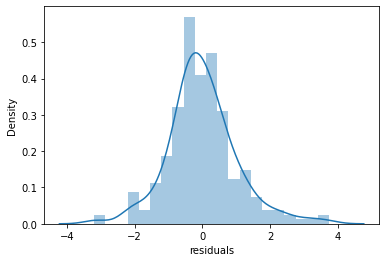

In [58]:
sns.distplot(df['residuals'])

<AxesSubplot:xlabel='observed-predicted', ylabel='Density'>

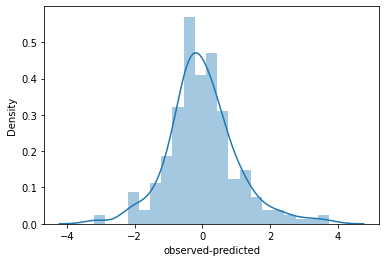

In [32]:
sns.distplot(df["observed-predicted"])

In [61]:
SSE = np.sum(df["Squared Error"]) # SSE = sum((ob-predicted)^2)
SSE

252.788743850776

In [ ]:
SST # =sum((y-ybar)^2)

SST = SSR + SSE

SSR = SST - SSE
           
           SSR : sum of square of residuals

In [62]:
SSR = SST-SSE

In [63]:
SSR

212.4237331984044

## Coefficient of determination (R^2)   :

In [69]:
r_square = SSR / SST

In [65]:
r_square

0.45661658635167646

In [66]:
np.sqrt(r_square)

0.6757341092113647

In [68]:
scipy.stats.linregress(df["total_bill"],df["tip"])

LinregressResult(slope=0.1050245173843534, intercept=0.9202696135546726, rvalue=0.6757341092113641, pvalue=6.692470646864404e-34, stderr=0.007364789848762602, intercept_stderr=0.1597347463764325)

    We can conclude tht 67.57% if total sum of squares can be explained by the estimated regression equation to predict the tip amount. The remainder is error. 

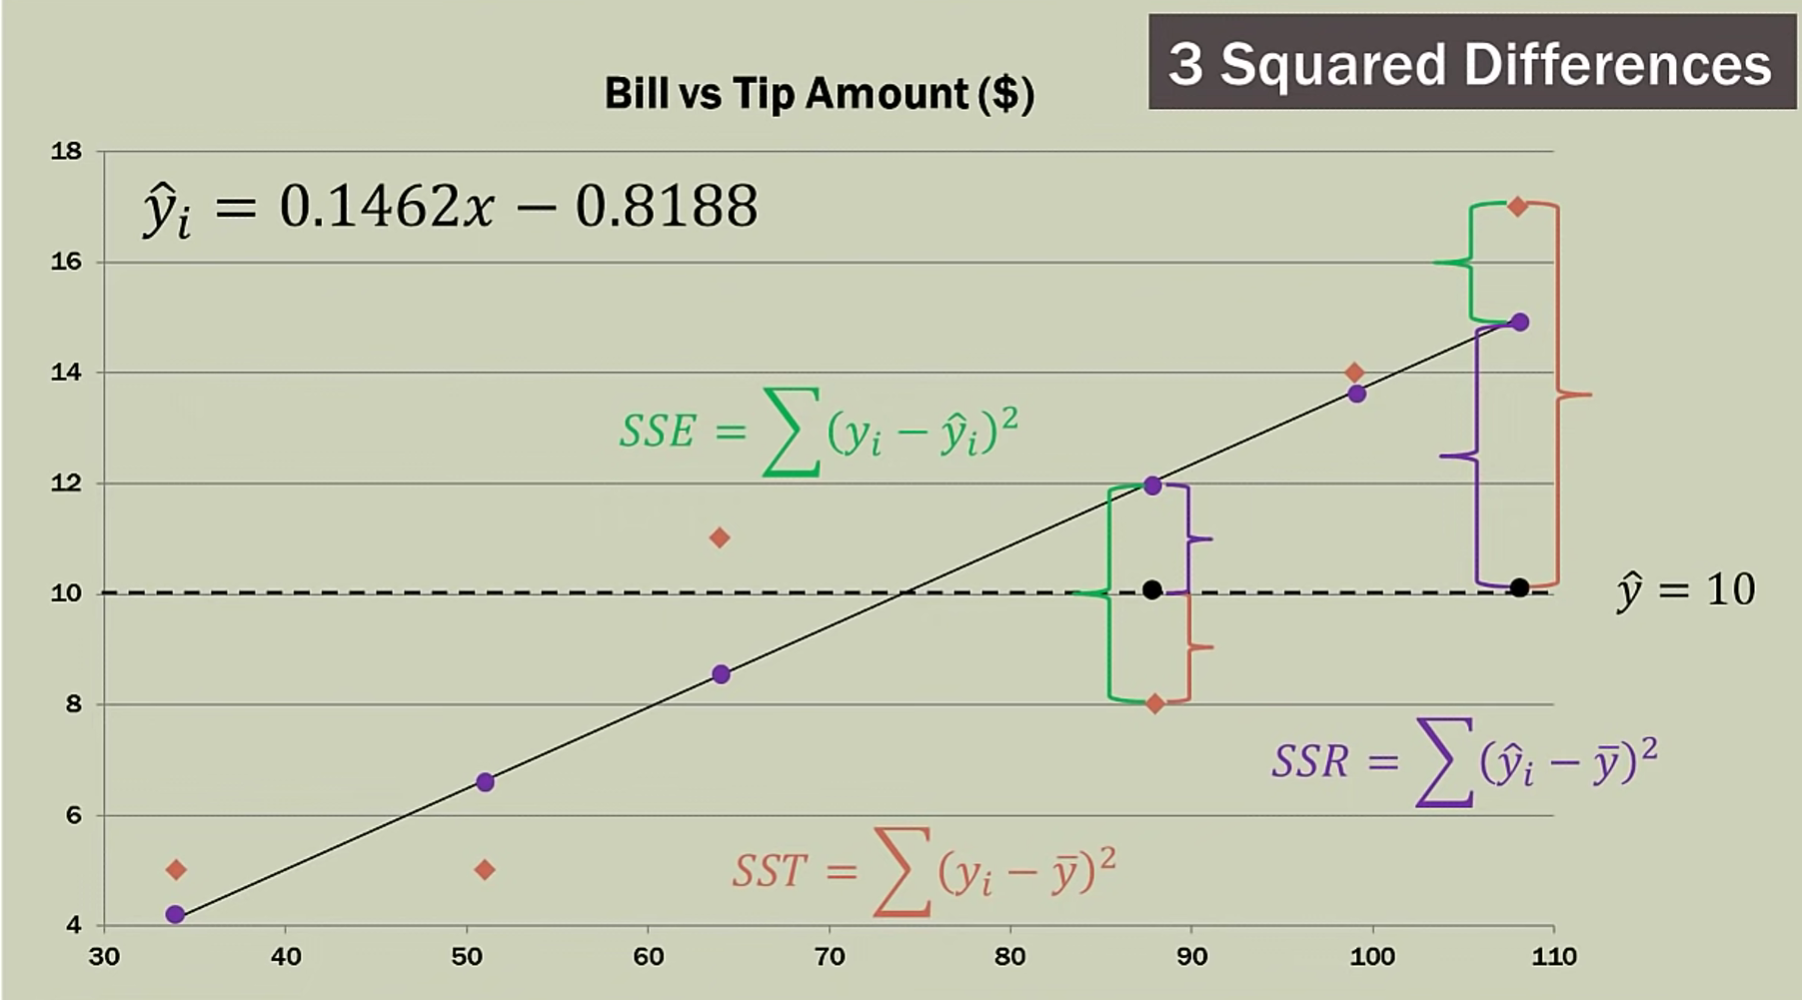
https://www.youtube.com/watch?v=kHZBy1uVNnM&list=PLIeGtxpvyG-LoKUpV0fSY8BGKIMIdmfCi&index=4

In [41]:
slope,intercept

(0.10502451738435341, 0.9202696135546722)

In [42]:
# for everey 1$ increase in the bill , we would predict an increase in tip of 0.105$.

In [43]:
# standardizing total bill and tips

In [70]:
df["z-bill"] = (df["total_bill"]-df["total_bill"].mean())/df["total_bill"].std()
df["z-tip"] = (df["tip"]-df["tip"].mean())/df["tip"].std()
df

,total_bill,tip,predicted,observed-predicted,residuals,squared_error,Squared Error,z-bill,z-tip
0,16.99,1.01,2.704636,-1.694636,-1.694636,2.871792,2.871792,-0.314066,-1.436993
1,10.34,1.66,2.006223,-0.346223,-0.346223,0.119870,0.119870,-1.061054,-0.967217
2,21.01,3.50,3.126835,0.373165,0.373165,0.139252,0.139252,0.137497,0.362610
3,23.68,3.31,3.407250,-0.097250,-0.097250,0.009458,0.009458,0.437416,0.225291
4,24.59,3.61,3.502822,0.107178,0.107178,0.011487,0.011487,0.539635,0.442111
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3.969131,1.950869,1.950869,3.805888,3.805888,1.038377,2.111622
240,27.18,2.00,3.774836,-1.774836,-1.774836,3.150043,3.150043,0.830568,-0.721488
241,22.67,2.00,3.301175,-1.301175,-1.301175,1.693057,1.693057,0.323964,-0.721488
242,17.82,1.75,2.791807,-1.041807,-1.041807,1.085361,1.085361,-0.220833,-0.902171


<AxesSubplot:xlabel='z-tip', ylabel='Density'>

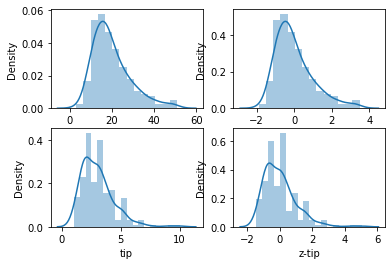

In [71]:
plt.subplots()
plt.subplot(221)
sns.distplot(df["total_bill"])
plt.subplot(222)
sns.distplot(df["z-bill"])
plt.subplot(223)
sns.distplot(df["tip"])
plt.subplot(224)
sns.distplot(df["z-tip"])

In [72]:
scipy.stats.linregress(df["total_bill"],df["tip"])

LinregressResult(slope=0.1050245173843534, intercept=0.9202696135546726, rvalue=0.6757341092113641, pvalue=6.692470646864404e-34, stderr=0.007364789848762602, intercept_stderr=0.1597347463764325)

In [75]:
scipy.stats.linregress(df["z-bill"],df["z-tip"])
#as z scored variables ka mean =0 and varianc =1 hota hai and is case m slope = pearson coeffieicent

# intercept becomes zero , and centroid (0,0)

LinregressResult(slope=0.6757341092113642, intercept=2.657283011516967e-16, rvalue=0.6757341092113645, pvalue=6.692470646863736e-34, stderr=0.04738550418441546, intercept_stderr=0.04728830304783622)

In [76]:
np.corrcoef(x = df["z-tip"],y=  df["z-bill"])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

<AxesSubplot:xlabel='z-bill', ylabel='z-tip'>

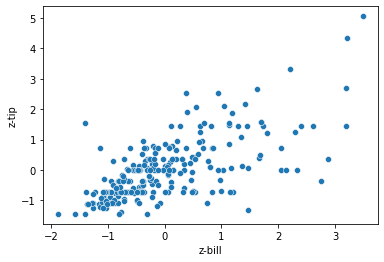

In [77]:
sns.scatterplot(df["z-bill"],df["z-tip"])

In [78]:
# 0.6757 increase in Y , or r-standard deviation , 1-SD increase  in X.

In [79]:
slope_z = (np.sum(((df["z-bill"] - df["z-bill"].mean())) * ((df["z-tip"] - df["z-tip"].mean())) )) / (np.sum(((df["z-bill"] - df["z-bill"].mean()))**2))
intercept_z = df["z-tip"].mean() - (slope * df["z-bill"].mean())


In [80]:
slope_z,intercept_z

(0.6757341092113642, 1.1810840750379066e-17)

     original regression slope = pearson Correlation * (STD of Y/
                                                         STD of X)
                                                         

In [81]:
original_regression_slope = (np.corrcoef(x = df["z-tip"],y=  df["z-bill"])[0][-1])  * (df["tip"].std()/df["total_bill"].std())
original_regression_slope

0.10502451738435346

In [82]:
slope

0.10502451738435341

### Linear Regression, Understanding Model Error

In [83]:
SST,SSE,SSR,r_square,np.sqrt(r_square)

(465.2124770491804,
 252.788743850776,
 212.4237331984044,
 0.45661658635167646,
 0.6757341092113647)

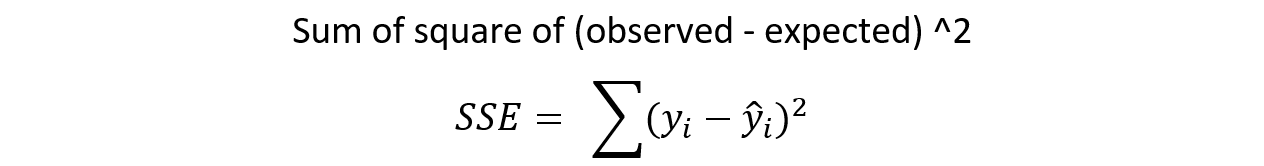

### Calculating SSE (Residual) and MSE

In [84]:
np.sum((df["tip"]-df["predicted"])**2)

252.788743850776

    # mean square error MSE is an estiamte of varinace of the the error eplilon . 
    # in other words, how spread out the data points are from the regression line.
    # MSE is SSE/df (df is 2 because we are estimating slope and intercept)
    
   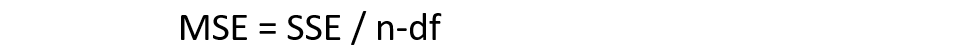

In [57]:
MSE = SSE / (len(df["tip"]) - 2) #df is degrees of freedom , here 2 as we are estimating 2 predictors)
MSE

1.0445815861602314

### Standard error is just squre root of MSE 


In [58]:
Standar_error = np.sqrt(MSE)
Standar_error

1.02204774162474

#### So the average distnace of data points from fit line is about 1.022 


####  so the standard error , a measure of how well the regression model makes predictions. 
#### can be used to make prediction intervals


## How much variance in the dependent variable is explained by model/independent variable ? 
   - #### for this look at value of R_squared  or Adjusted-R^2
    
## Does a statistically significant linear relationship exist between independent and dependent variables ? 
   - #### Is overall F-test or t-test (in simple linear regresseion there are actually same thing) significant ? 
   - #### Can we reject null Hypothesis that the slope b1 of the regression line is 0 ? 

   - #### slope = 0 means no correlation

   - #### Does the Confidnece Interval for the slope b1 contain 0 ! (if it does , not exactly sure if linear relation exists  )
   
   
   
  https://www.youtube.com/watch?v=W5Bxj88X4JQ&list=PLIeGtxpvyG-LoKUpV0fSY8BGKIMIdmfCi&index=7

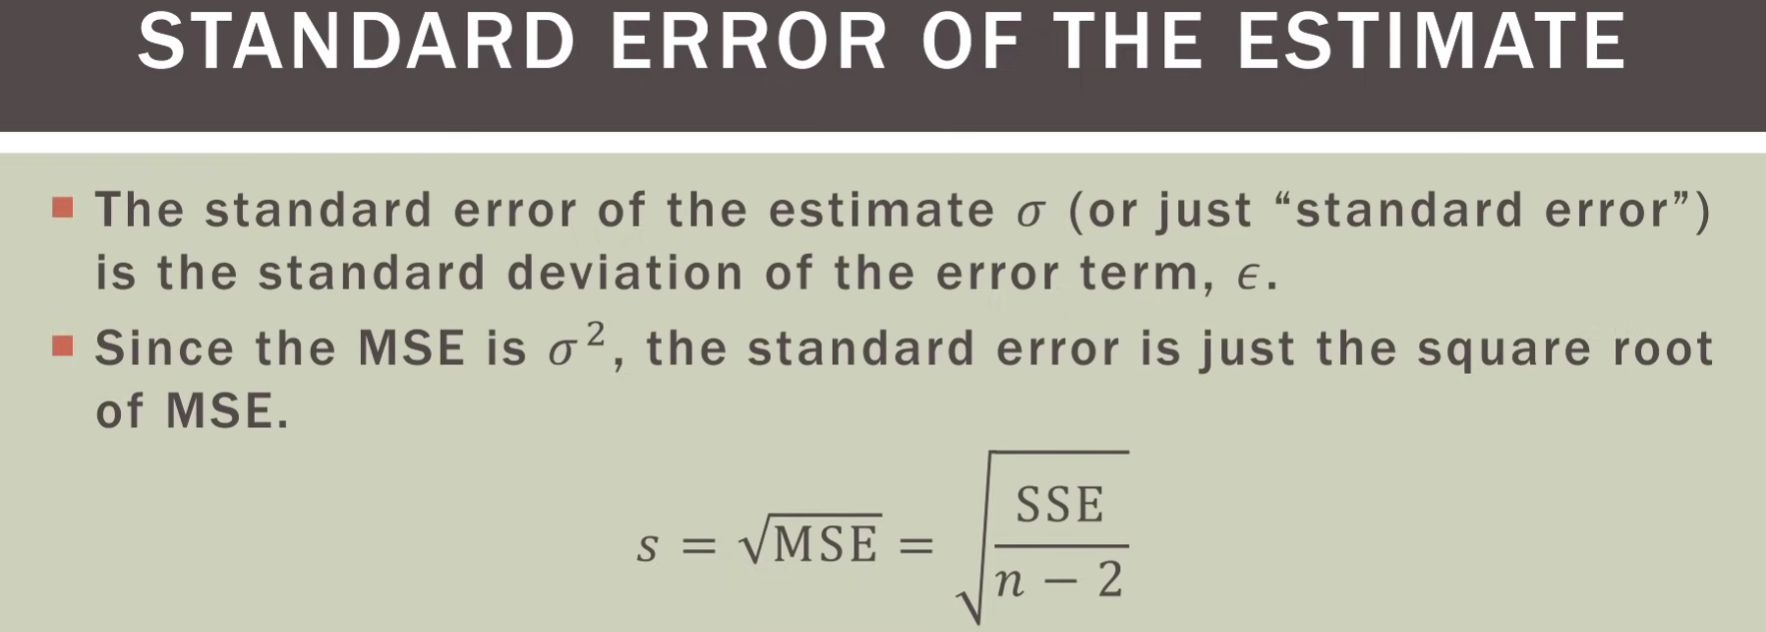

In [59]:
MSE,Standar_error

(1.0445815861602314, 1.02204774162474)

### Confidence Interval of Slope : 

    b1 +/- t_alfa_by_2 * (Standard deviation of the slope)
    
    
    b1 = point estimator for slope
    t_alfa_by_2 = t-value
    t_alfa_by_2 * (Standard deviation of the slope) = margin of error
    
    
  
 
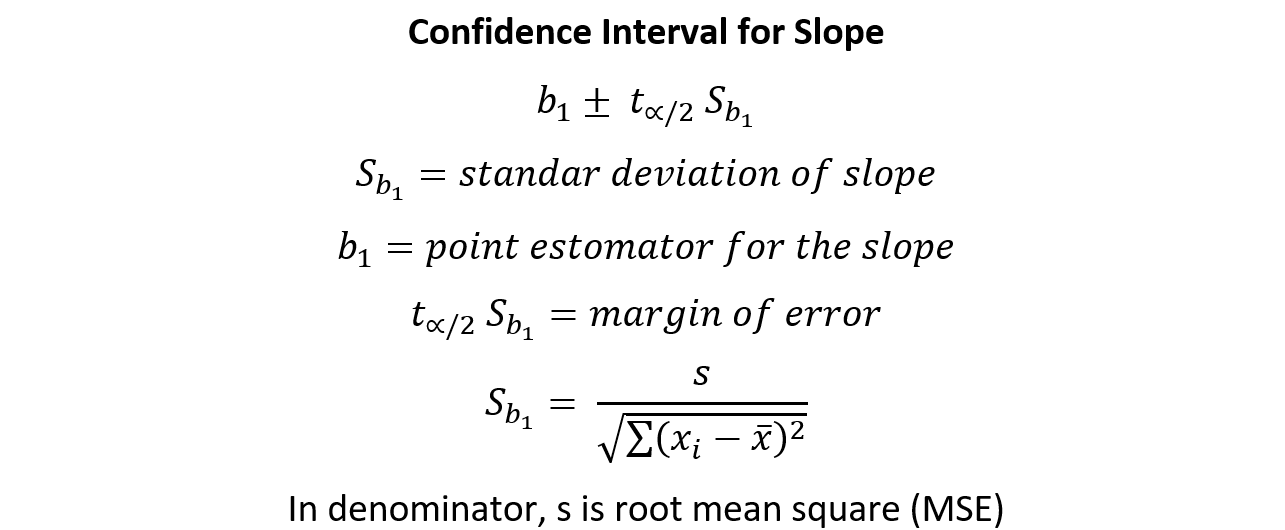

In [60]:
Standard_deviation_of_the_slope = np.sqrt(MSE) / np.sqrt(np.sum((df["total_bill"] - df["total_bill"].mean())**2))
Standard_deviation_of_the_slope

0.007364789848762592

In [61]:
(slope - ((1.96)*(Standard_deviation_of_the_slope))),(slope + ((1.96)*(Standard_deviation_of_the_slope)))

(0.09058952928077872, 0.1194595054879281)

### We are 95% confident that the interaval above contains the true slope( for population ) of the regression line 

    Null Hypothesis :        b1  = 0
    Alternative Hypothesis : b1 != 0

### Interval doesnt contains 0. we can reject Null Hypothesis and conclude b1 != 0

### test statistic : t = b1 / Sb1 (slope/Standard_deviation_of_the_slope)

In [62]:
slope/Standard_deviation_of_the_slope

14.260354951200581

    test_static > 1.96 , means we reject null Hypothesis 

In [63]:
stats.linregress(df["total_bill"],df["tip"])

<IPython.core.display.Javascript object>

LinregressResult(slope=0.10502451738435342, intercept=0.9202696135546722, rvalue=0.6757341092113647, pvalue=6.6924706468631615e-34, stderr=0.007364789848762593, intercept_stderr=0.1597347463764323)

### Excel Regression output

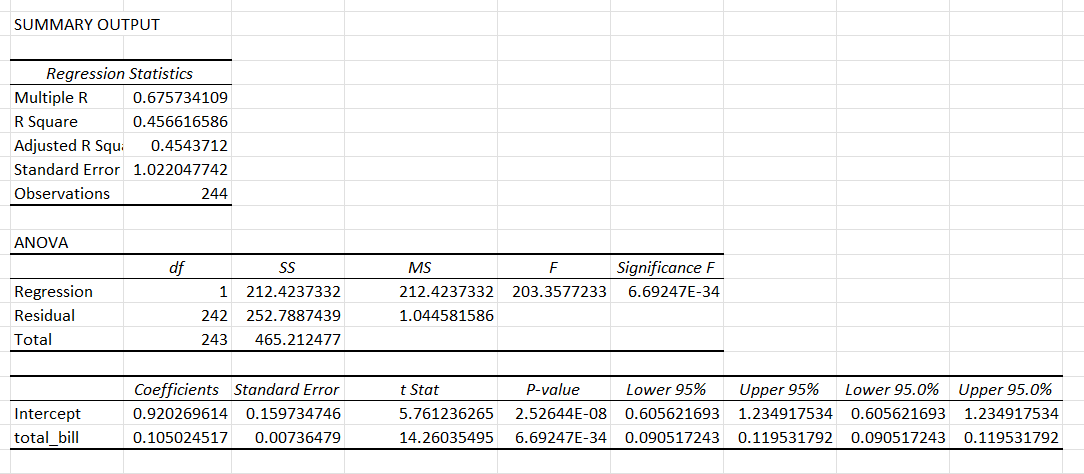

In [64]:
slope,intercept

(0.10502451738435341, 0.9202696135546722)

In [65]:
# table that has the total bill amount 30$ 
# based on the model we created , what tip we can expect  

In [66]:
(slope) * 30  + intercept

4.071005135085274

In [67]:
# Since the model is based off a sample and therefore we estimated .
# regression is not deterministic
# so we can ask , what is the average tip for 30$ total bill amount 
# so the confidnce interval for mean tip when bill is  64$ 



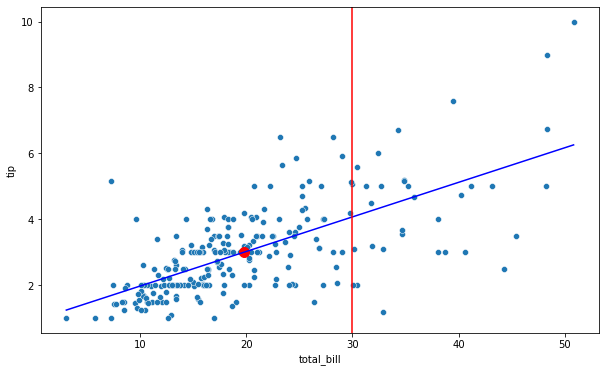

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(y = df["tip"],
               x = df["total_bill"])
plt.plot([df["total_bill"].mean()],
             [df["tip"].mean()],marker = "o",markersize = 10,markeredgecolor = "red", color = "r")
x = np.linspace(min(df["total_bill"]),max(df["total_bill"]))
y = estimatorFunction(x,slope,intercept)
plt.plot(x,y,color = "b")
plt.axvline(x= [30],color ="r")
plt.show()

In [69]:
df.head()

,total_bill,tip,predicted,observed-predicted,Squared Error,z-bill,z-tip
0,16.99,1.01,2.704636,-1.694636,2.871792,-0.314066,-1.436993
1,10.34,1.66,2.006223,-0.346223,0.119870,-1.061054,-0.967217
2,21.01,3.50,3.126835,0.373165,0.139252,0.137497,0.362610
3,23.68,3.31,3.407250,-0.097250,0.009458,0.437416,0.225291
4,24.59,3.61,3.502822,0.107178,0.011487,0.539635,0.442111


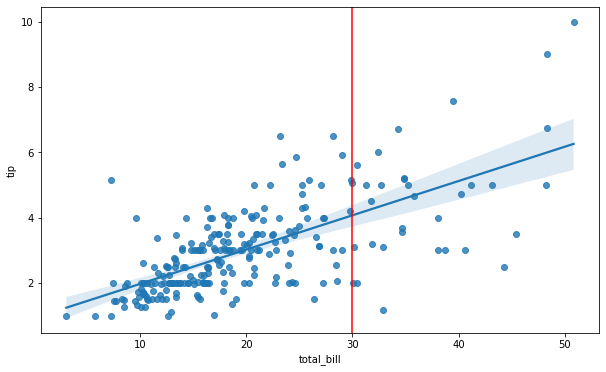

In [70]:
plt.figure(figsize=(10,6))

sns.regplot(x="total_bill", y="tip", data=df)
plt.axvline(x= [30],color = "r")
plt.show()

In [71]:
def EstimatorFunction(x,slope,intercept):
    return (slope*x) + intercept

In [72]:
estimatedY = EstimatorFunction(30,slope,intercept) # predicted value of Y . when x= 30
estimatedY

4.071005135085274

In [73]:
# estimated_standard_error_of_estimate  = 

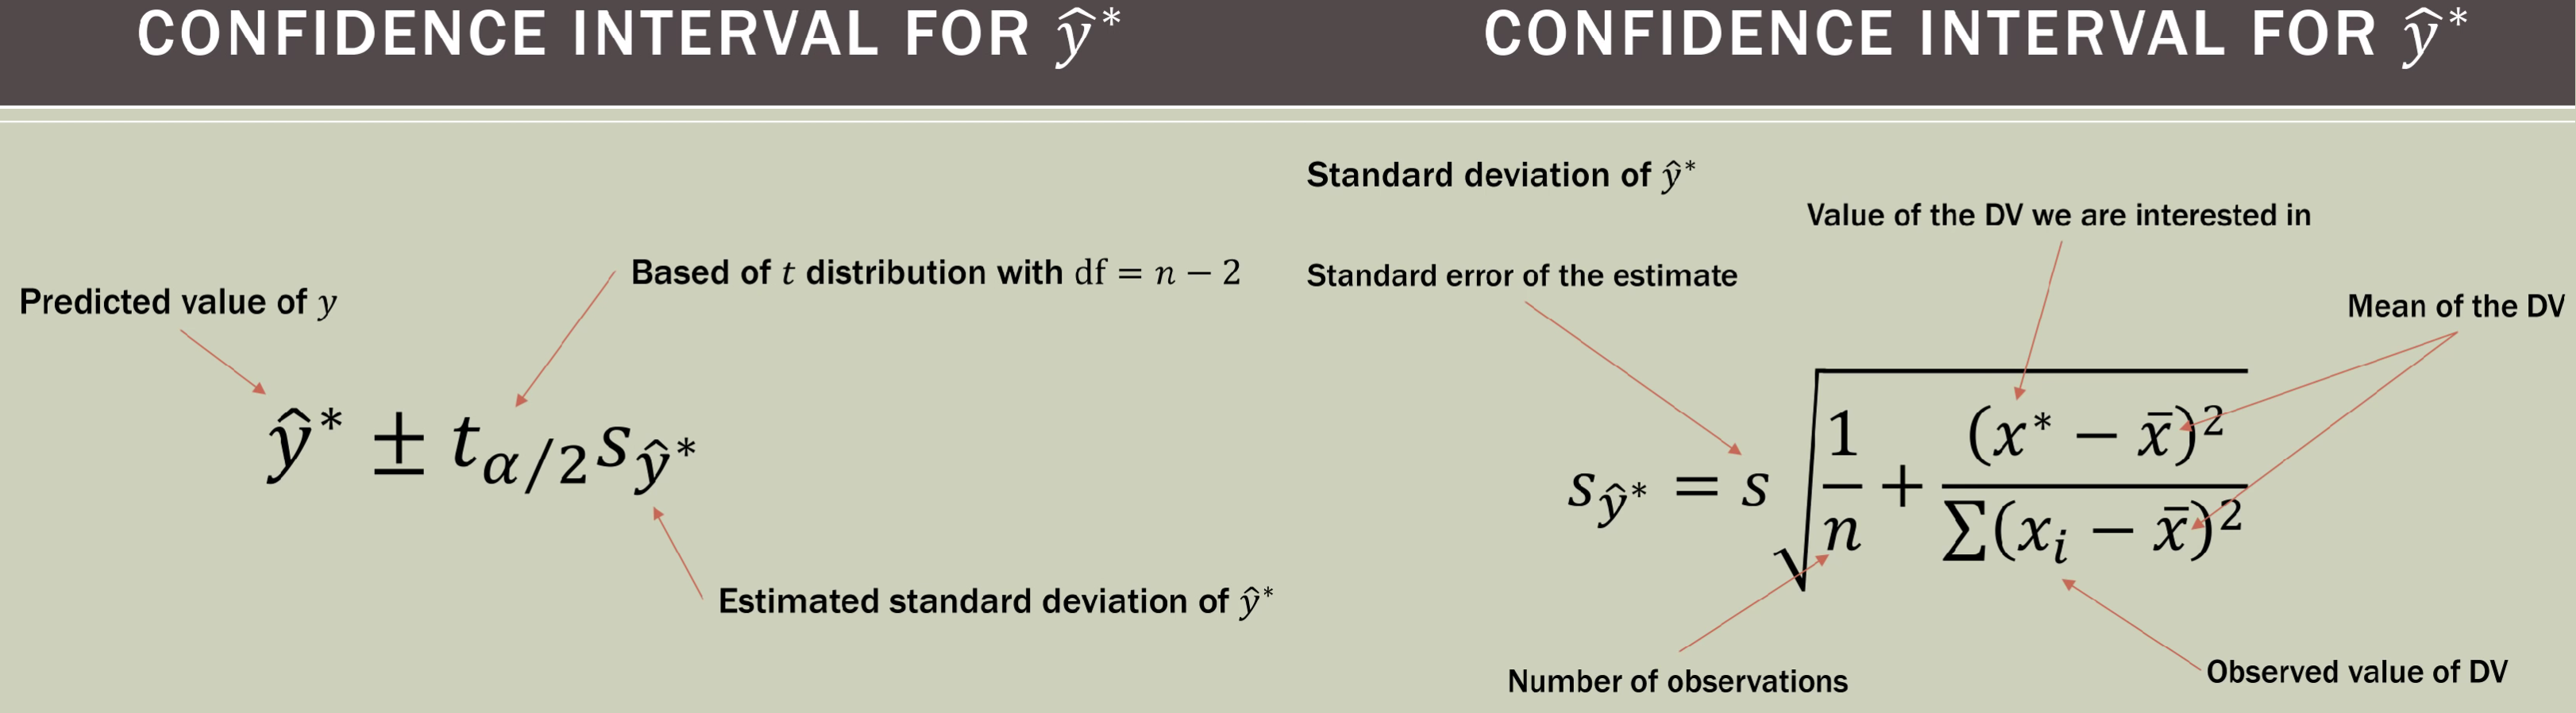

In [74]:
estimated_standard_error_of_estimate = np.sqrt(MSE)* np.sqrt((1/len(df["total_bill"])) + (((30-df["total_bill"].mean())**2)/(np.sum((df["total_bill"]-df["total_bill"].mean())**2))))
estimated_standard_error_of_estimate

0.09969844701056263

In [75]:
# estimated Y coonfidence interval

In [76]:
(estimatedY - (1.96 * estimated_standard_error_of_estimate)),(estimatedY + (1.96 * estimated_standard_error_of_estimate))

(3.8755961789445714, 4.266414091225977)

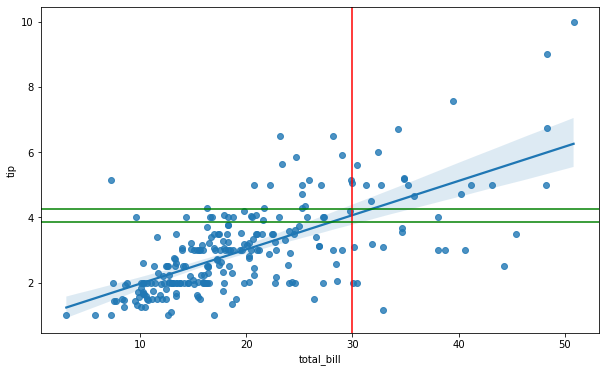

In [77]:
plt.figure(figsize=(10,6))

sns.regplot(x="total_bill", y="tip", data=df)
plt.axvline(x= [30],color = "r")
plt.axhline(y= [3.8755961789445714],color = "g")
plt.axhline(y= [4.266414091225977],color = "g")
plt.show()

In [78]:
def Confidence_Interval_estimator(x,slope,intercept):
    def EstimatorFunction(x,slope,intercept):
        return (slope*x) + intercept
    estimatedY = EstimatorFunction(x,slope,intercept) # predicted value of Y . when x
    
    estimated_standard_error_of_estimate = np.sqrt(MSE)* np.sqrt((1/len(df["total_bill"])) + (((x-df["total_bill"].mean())**2)/(np.sum((df["total_bill"]-df["total_bill"].mean())**2))))
    
    return (estimatedY - (1.96 * estimated_standard_error_of_estimate)),(estimatedY + (1.96 * estimated_standard_error_of_estimate))


In [79]:
Confidence_Interval_estimator(5,slope,intercept)

(1.196392952442183, 1.6943914485106955)

In [80]:
Confidence_Interval_estimator(500,slope,intercept)

(46.49945793224946, 60.365598679213285)

In [81]:
Confidence_Interval_estimator(5000,slope,intercept)

(454.1534114786115, 597.9323015920319)

## Visualizing Gradiant Descent 

In [82]:
slope,intercept

(0.10502451738435341, 0.9202696135546722)

In [83]:
np.sum(df["Squared Error"])

252.788743850776

In [84]:
SSE

252.788743850776

In [85]:
intercept

0.9202696135546722

In [86]:
x = (np.arange(-1,3,0.1))



In [87]:
len(x)

40

In [88]:
incp = []
for i in x:
    incp.append(np.sum((df["tip"]-( (slope * df["total_bill"]) + i ))**2))

In [89]:
len(incp)

40

In [90]:
incp = np.array(incp)

In [91]:
len(x),len(incp)

(40, 40)

<AxesSubplot:>

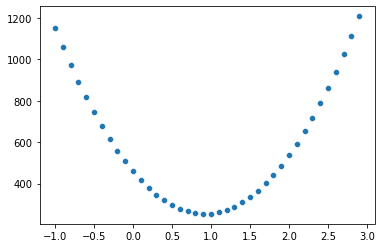

In [92]:
sns.scatterplot(x=x,y=incp)

In [93]:
df

,total_bill,tip,predicted,observed-predicted,Squared Error,z-bill,z-tip
0,16.99,1.01,2.704636,-1.694636,2.871792,-0.314066,-1.436993
1,10.34,1.66,2.006223,-0.346223,0.119870,-1.061054,-0.967217
2,21.01,3.50,3.126835,0.373165,0.139252,0.137497,0.362610
3,23.68,3.31,3.407250,-0.097250,0.009458,0.437416,0.225291
4,24.59,3.61,3.502822,0.107178,0.011487,0.539635,0.442111
...,...,...,...,...,...,...,...
239,29.03,5.92,3.969131,1.950869,3.805888,1.038377,2.111622
240,27.18,2.00,3.774836,-1.774836,3.150043,0.830568,-0.721488
241,22.67,2.00,3.301175,-1.301175,1.693057,0.323964,-0.721488
242,17.82,1.75,2.791807,-1.041807,1.085361,-0.220833,-0.902171


In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(df[['total_bill', 'tip']])
scaled_values = scaler.transform(df[['total_bill', 'tip']])  # returns numpy.ndarray not df.
scaled_df = pd.DataFrame(scaled_values, columns=['total_bill', 'tip'])
scaled_df.head()

,total_bill,tip
0,0.291579,0.001111
1,0.152283,0.073333
2,0.375786,0.277778
3,0.431713,0.256667
4,0.450775,0.290000


In [95]:
scaled_df

,total_bill,tip
0,0.291579,0.001111
1,0.152283,0.073333
2,0.375786,0.277778
3,0.431713,0.256667
4,0.450775,0.290000
...,...,...
239,0.543779,0.546667
240,0.505027,0.111111
241,0.410557,0.111111
242,0.308965,0.083333


In [96]:
scaled_df.describe()

,total_bill,tip
count,244.000000,244.000000
mean,0.350145,0.222031
std,0.186477,0.153738
min,0.000000,0.000000
25%,0.215281,0.111111
50%,0.308442,0.211111
75%,0.441087,0.284722
max,1.000000,1.000000


In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
model = LinearRegression()

In [100]:
X = scaled_df["total_bill"].values
Y = scaled_df["tip"].values
X = X.reshape(X.size,1)
Y = Y.reshape(Y.size,1)

In [101]:
model.fit(X,Y)

LinearRegression()

In [102]:
model.coef_,model.intercept_

(array([[0.55709672]]), array([0.0269661]))

In [103]:
slope,intercept

(0.10502451738435341, 0.9202696135546722)

In [104]:
Y_hat = model.predict(X)

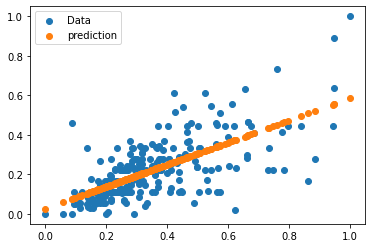

In [105]:
plt.scatter(X,
           Y,label = "Data")
plt.scatter(X,
           y = Y_hat, label = "prediction")
plt.legend()
plt.show()

In [106]:
model.score(X,Y)   # R^2 value

0.45661658635167646